In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [6]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations,callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers

from keras.models import Model
import gc

/kaggle/input/residual-network-for-tabular-data/prediction_embedding_residual_nn_model_train.csv
/kaggle/input/residual-network-for-tabular-data/prediction_embedding_residual_nn_model_test.csv
/kaggle/input/residual-network-for-tabular-data/__results__.html
/kaggle/input/residual-network-for-tabular-data/submission.csv
/kaggle/input/residual-network-for-tabular-data/__notebook__.ipynb
/kaggle/input/residual-network-for-tabular-data/__output__.json
/kaggle/input/residual-network-for-tabular-data/custom.css
/kaggle/input/tabular-residual-network/mlp_1_9.h5
/kaggle/input/tabular-residual-network/mlp_1_6.h5
/kaggle/input/tabular-residual-network/mlp_1_10.h5
/kaggle/input/tabular-residual-network/__results__.html
/kaggle/input/tabular-residual-network/mlp_1_7.h5
/kaggle/input/tabular-residual-network/mlp_1_1.h5
/kaggle/input/tabular-residual-network/mlp_1_8.h5
/kaggle/input/tabular-residual-network/submission.csv
/kaggle/input/tabular-residual-network/mlp_1_2.h5
/kaggle/input/tabular-residu

## Data Set

In [7]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
sam = pd.read_csv('sample_submission.csv')

In [8]:
MV1 = df1.isnull().sum()
print(f'Missing Value 1:\n{MV1[MV1 > 0]}\n')

MV2 = df2.isnull().sum()
print(f'Missing Value 2:\n{MV2[MV2 > 0]}\n')

Missing Value 1:
Series([], dtype: int64)

Missing Value 2:
Series([], dtype: int64)



In [9]:
# display(df1.info(), df2.info())
display(df1, df1.describe().transpose())
display(df2, df2.describe().transpose())

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,...,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,3,2,1,0,0,1,0,Class_7


,count,mean,std,min,25%,50%,75%,max
id,200000.0,99999.500000,57735.171256,0.0,49999.75,99999.5,149999.25,199999.0
feature_0,200000.0,0.972710,3.941836,0.0,0.00,0.0,1.00,61.0
feature_1,200000.0,1.168365,3.993407,0.0,0.00,0.0,1.00,51.0
feature_2,200000.0,2.219325,6.476570,0.0,0.00,0.0,1.00,64.0
feature_3,200000.0,2.296735,7.551858,0.0,0.00,0.0,1.00,70.0
...,...,...,...,...,...,...,...,...
feature_70,200000.0,1.219210,4.826003,0.0,0.00,0.0,1.00,67.0
feature_71,200000.0,0.806895,2.458741,0.0,0.00,0.0,1.00,30.0
feature_72,200000.0,1.282925,4.261420,0.0,0.00,0.0,1.00,61.0
feature_73,200000.0,2.940210,10.784650,0.0,0.00,0.0,1.00,130.0


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0


,count,mean,std,min,25%,50%,75%,max
id,100000.0,249999.50000,28867.657797,200000.0,224999.75,249999.5,274999.25,299999.0
feature_0,100000.0,0.99051,4.018930,0.0,0.00,0.0,1.00,61.0
feature_1,100000.0,1.16852,4.030234,0.0,0.00,0.0,1.00,51.0
feature_2,100000.0,2.18273,6.402817,0.0,0.00,0.0,1.00,64.0
feature_3,100000.0,2.31624,7.584742,0.0,0.00,0.0,1.00,70.0
...,...,...,...,...,...,...,...,...
feature_70,100000.0,1.20149,4.784381,0.0,0.00,0.0,1.00,67.0
feature_71,100000.0,0.79863,2.427921,0.0,0.00,0.0,1.00,30.0
feature_72,100000.0,1.31336,4.443859,0.0,0.00,0.0,1.00,61.0
feature_73,100000.0,2.93515,10.788330,0.0,0.00,0.0,1.00,127.0


Class_6    51811
Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Name: target, dtype: int64

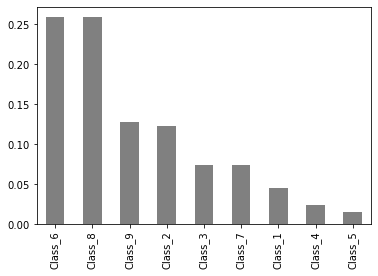

In [10]:
df1['target'].value_counts(normalize=True).plot(kind='bar', color='gray')
df1['target'].value_counts()

In [11]:
data1 = df1.copy()
data1['target'] = data1['target'].str.slice(start=6).astype(int) - 1

# dic = {'Class_1':0, 'Class_2':1, 'Class_3':2, 'Class_4':3, 'Class_5':4, 'Class_6':5, 'Class_7':6, 'Class_8':7, 'Class_9':8 }
# data1['target'].replace(dic, inplace=True)
display(df1['target'], data1['target'])

0         Class_6
1         Class_6
2         Class_2
3         Class_8
4         Class_2
           ...   
199995    Class_6
199996    Class_6
199997    Class_8
199998    Class_7
199999    Class_8
Name: target, Length: 200000, dtype: object

0         5
1         5
2         1
3         7
4         1
         ..
199995    5
199996    5
199997    7
199998    6
199999    7
Name: target, Length: 200000, dtype: int32

In [12]:
X = data1.drop(columns = ['id','target'])
display(X)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,6,0,1,32,0,6,0,0,...,1,0,1,1,0,0,0,4,1,0
199996,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199997,1,2,0,0,0,2,0,1,8,4,...,4,1,0,1,1,1,0,1,0,0
199998,0,0,2,0,2,1,0,0,3,1,...,0,0,0,3,2,1,0,0,1,0


In [13]:
y = data1.target
display(y)

0         5
1         5
2         1
3         7
4         1
         ..
199995    5
199996    5
199997    7
199998    6
199999    7
Name: target, Length: 200000, dtype: int32

In [14]:
data2 = df2.copy()
XX = data2.drop(columns = ['id'])
display(XX)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,0,0,0,0,2,2,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


## Split

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.50, random_state=123) 

## Scaling

In [16]:
X_scaled = minmax_scaling(X, columns=X.columns)
# display(X_scaled)

In [17]:
train_Xs, val_Xs, train_ys, val_ys = train_test_split(X_scaled, y, test_size=0.50, random_state=123) 

In [18]:
XXs = minmax_scaling(XX, columns=XX.columns)
# display(XXs)

## Features

In [19]:
yf = df1.target
Xf = df1.drop(columns = ['id', 'target'])

# Label encoding for categoricals
for colname in Xf.select_dtypes("object"):    
    Xf[colname], _ = Xf[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = Xf.dtypes == int

In [20]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=123)    
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)                         
    mi_scores = mi_scores.sort_values(ascending=False)                          
    return mi_scores

mi_scores = make_mi_scores(Xf, yf, discrete_features)                          
display(mi_scores)

feature_37    0.041116
feature_18    0.038975
feature_43    0.038818
feature_12    0.037193
feature_53    0.033789
                ...   
feature_17    0.004225
feature_47    0.003194
feature_74    0.002808
feature_22    0.002797
feature_36    0.000000
Name: MI Scores, Length: 75, dtype: float64

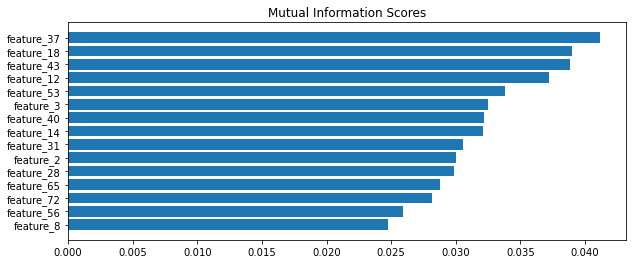

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(figsize=(10, 4))
plot_mi_scores(mi_scores.head(15))

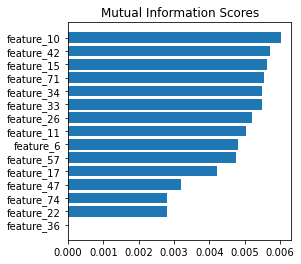

In [22]:
plt.figure(figsize=(4, 4))
plot_mi_scores(mi_scores.tail(15))

In [23]:
def drop_uninformative(df, mi_scores):    
    return df.loc[:, mi_scores > 0.003]

Xff = drop_uninformative(Xf, mi_scores)
# display(Xff)

In [24]:
train_Xf, val_Xf, train_yf, val_yf = train_test_split(Xff, yf, test_size=0.50, random_state=123) 

In [25]:
XXf = XX.drop(columns = ['feature_36'])
# display(XXf)

## HistGradientBoostingClassifier

### Validation Model

In [26]:
model1v = HistGradientBoostingClassifier(max_iter=250,
                                         validation_fraction=None, 
                                         learning_rate=0.01, 
                                         max_depth=10, 
                                         min_samples_leaf=24, 
                                         max_leaf_nodes=60,
                                         random_state=123)

model1v.fit(train_X, train_y)
oof_pred1 = model1v.predict_proba(val_X)
log_loss(val_y, oof_pred1)

1.7577106602774941

In [27]:
predictions1 = model1v.predict(val_X)
accuracy1 = accuracy_score(val_y, predictions1)
display(accuracy1) 

0.36082

### Model 1

In [28]:
model1 = HistGradientBoostingClassifier(max_iter=250,
                                        validation_fraction=None, 
                                        learning_rate=0.01, 
                                        max_depth=10, 
                                        min_samples_leaf=24, 
                                        max_leaf_nodes=60,
                                        random_state=123,
                                        verbose=1)

model1.fit(X, y)
pred1 = model1.predict_proba(XX)
display(pred1, pred1.shape) 

Binning 0.120 GB of training data: 1.458 s
Fitting gradient boosted rounds:
[1/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.89422, in 3.120s
[2/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.89105, in 2.741s
[3/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.88798, in 2.773s
[4/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.88500, in 2.697s
[5/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.88210, in 2.398s
[6/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.87925, in 2.513s
[7/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.87649, in 2.887s
[8/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.87377, in 2.682s
[9/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.87112, in 3.179s
[10/250] 9 trees, 540 leaves (60 on avg), max depth = 10, train loss: 1.86853, in 3.346s
[11/250] 9 trees, 540 leaves (60 on avg), m

array([[0.0506754 , 0.36641524, 0.16219061, ..., 0.02658272, 0.06125981,
        0.11622601],
       [0.0424592 , 0.11592926, 0.08621544, ..., 0.08067599, 0.30167385,
        0.1200328 ],
       [0.02846809, 0.0444448 , 0.02796164, ..., 0.03826706, 0.13997959,
        0.07025486],
       ...,
       [0.07943539, 0.21253954, 0.13595425, ..., 0.05560375, 0.15511554,
        0.15613331],
       [0.02860645, 0.03396969, 0.02906809, ..., 0.06788597, 0.33196542,
        0.0737044 ],
       [0.04305789, 0.08767412, 0.07974038, ..., 0.07555969, 0.21920015,
        0.12729936]])

(100000, 9)

In [29]:
sub1 = sam.copy()
display(sub1)

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99996,299996,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99997,299997,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99998,299998,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


In [30]:
sub1.iloc[:, 1:] = pred1.data
display(sub1)

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.050675,0.366415,0.162191,0.024653,0.013168,0.178830,0.026583,0.061260,0.116226
1,200001,0.042459,0.115929,0.086215,0.021717,0.014302,0.216994,0.080676,0.301674,0.120033
2,200002,0.028468,0.044445,0.027962,0.013683,0.008591,0.628350,0.038267,0.139980,0.070255
3,200003,0.052536,0.099162,0.085578,0.026462,0.015668,0.246338,0.072463,0.239011,0.162780
4,200004,0.041676,0.115072,0.071381,0.026210,0.015826,0.317036,0.054632,0.223420,0.134747
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.065681,0.379101,0.134153,0.025520,0.013698,0.116467,0.042422,0.092939,0.130019
99996,299996,0.057568,0.271094,0.110188,0.024265,0.014925,0.189780,0.044026,0.136382,0.151771
99997,299997,0.079435,0.212540,0.135954,0.028692,0.014756,0.161770,0.055604,0.155116,0.156133
99998,299998,0.028606,0.033970,0.029068,0.013893,0.012367,0.408539,0.067886,0.331965,0.073704


In [31]:
sub1.to_csv("submission1.csv",index=False)
# Public Score: 1.75770
!ls

1-tps-jun-21-histgradient-catboost-nn.ipynb
Untitled.ipynb
sample_submission.csv
submission1.csv
test.csv
train.csv


## CatBoostClassifier

### Validation Model

In [2]:
model2v = CatBoostClassifier(depth=8,
                             iterations=1000,
                             learning_rate=0.02,                            
                             eval_metric='MultiClass',
                             loss_function='MultiClass', 
                             bootstrap_type= 'Bernoulli',
                             leaf_estimation_method='Gradient',
                             random_state=123,
                             task_type='GPU')                        

model2v.fit(train_X, train_y, verbose=100)
oof_pred2 = model2v.predict_proba(val_X)
log_loss(val_y, oof_pred2)

NameError: name 'CatBoostClassifier' is not defined

In [1]:
predictions2 = model2v.predict(val_X)
accuracy2 = accuracy_score(val_y, predictions2)
display(accuracy2) 

NameError: name 'model2v' is not defined

In [ ]:
model2v.feature_importances_

### Model 2

In [ ]:
model2 = CatBoostClassifier(depth=8,
                            iterations=1000,
                            learning_rate=0.02,                            
                            eval_metric='MultiClass',
                            loss_function='MultiClass', 
                            bootstrap_type= 'Bernoulli',
                            leaf_estimation_method='Gradient',
                            random_state=123,
                            task_type='GPU')   

model2.fit(X, y, verbose=100)
pred2 = model2.predict_proba(XX)
display(pred2, pred2.shape) 

In [ ]:
sub2 = sam.copy()
# display(sub2)

In [ ]:
sub2.iloc[:, 1:] = pred2.data
display(sub2)

In [ ]:
sub2.to_csv("submission2.csv",index=False)
# Public Score: 1.75011
!ls

## Neural Networks

### Model 3

In [ ]:
train = df1.copy()
test = df2.copy()
submission = sam.set_index('id')
targets = pd.get_dummies(df1['target'])

In [ ]:
def custom_metric(y_true, y_pred):
    y_pred = K.clip(y_pred, 1e-15, 1-1e-15)
    loss = K.mean(cce(y_true, y_pred))
    return loss

cce = tf.keras.losses.CategoricalCrossentropy()

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=1e-05, patience=8, verbose=0,
    mode='min', baseline=None, restore_best_weights=True)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.7, patience=2, verbose=0)

In [ ]:
def get_model():
    inputs = layers.Input(shape = (75,))
    
    embed = layers.Embedding(360, 8)(inputs)
    embed = layers.Flatten()(embed)
    
    hidden = layers.Dropout(0.2)(embed)
    hidden = tfa.layers.WeightNormalization(layers.Dense(units=32, activation='selu', kernel_initializer="lecun_normal"))(hidden)
    
    output = layers.Dropout(0.2)(layers.Concatenate()([embed, hidden]))
    output = tfa.layers.WeightNormalization(layers.Dense(units=32, activation='relu'))(output) 
    
    output = layers.Dropout(0.3)(layers.Concatenate()([embed, hidden, output]))
    output = tfa.layers.WeightNormalization(layers.Dense(units=32, activation='elu'))(output) 
    output = layers.Dense(9, activation = 'softmax')(output)
    
    model = keras.Model(inputs=inputs, outputs=output, name="res_nn_model")
    
    return model

In [ ]:
EPOCH = 50
SEED = 0
N_FOLDS = 10

NN_a_train_preds = []
NN_a_test_preds  = []
NN_a_oof_pred3 = []

oof_NN_a = np.zeros((train.shape[0],9))
pred_NN_a = np.zeros((test.shape[0],9))

skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

In [ ]:
for fold, (tr_idx, ts_idx) in enumerate(skf.split(train,train.iloc[:,-1])):

    X_train = train.iloc[:,1:-1].iloc[tr_idx]
    y_train = targets.iloc[tr_idx]
    X_test = train.iloc[:,1:-1].iloc[ts_idx]
    y_test = targets.iloc[ts_idx]
    K.clear_session()
    
    model_attention = get_model()

    model_attention.compile(loss='categorical_crossentropy', 
                            optimizer = keras.optimizers.Adam(learning_rate=2e-4), 
                            metrics=custom_metric)
    
    model_attention.fit(X_train, y_train,
                        batch_size = 256, epochs = EPOCH,
                        validation_data=(X_test, y_test),
                        callbacks=[es, plateau],
                        verbose = 0)
    
    pred_a = model_attention.predict(X_test) 
    oof_NN_a[ts_idx] += pred_a 
    score_NN_a = log_loss(y_test, pred_a)
    print(f"\nFOLD {fold} Score NN Attention model: {score_NN_a}")
    pred_NN_a += model_attention.predict(test.iloc[:,1:]) / N_FOLDS 
    
    NN_a_train_preds.append(oof_NN_a[ts_idx])
    NN_a_oof_pred3.append(model_attention.predict(val_X))
    NN_a_test_preds.append(model_attention.predict(test.iloc[:,1:]))
    
score_a = log_loss(targets, oof_NN_a)
print('=' * 60)
print(f"\n===== FINAL SCORE ATTENTION MODEL : {score_a} =====\n")  
print('=' * 60)
display(oof_NN_a, oof_NN_a.shape)

In [ ]:
oof_pred3 = sum(np.array(NN_a_oof_pred3)/N_FOLDS)
log_loss(val_y, oof_pred3)

In [ ]:
pred3 = sum(np.array(NN_a_test_preds)/N_FOLDS)
display(pred3, pred3.shape)

In [ ]:
sub3 = sam.copy()
# display(sub3)

In [ ]:
sub3.iloc[:, 1:] = pred3.data
display(sub3)

In [ ]:
sub3.to_csv("submission3.csv",index=False)
# Public Score: 1.74587
!ls

## Ensembling

In [ ]:
def generate(main, support, coeff):
    
    g = main.copy()    
    for i in main.columns[1:]:
        
        res = []
        lm, Is = [], []        
        lm = main[i].tolist()
        ls = support[i].tolist()  
        
        for j in range(len(main)):
            res.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))            
        g[i] = res
        
    return g

In [ ]:
sub4 = pd.read_csv('submission.csv')
# Public Score: 1.74522
# sub4

In [ ]:
sub5 = pd.read_csv('submission.csv')
# Public Score: 1.74450
# sub5

In [ ]:
sub = generate(sub2, sub1, 0.85)

sub = generate(sub3, sub , 0.85)

sub = generate(sub4, sub , 0.85)

sub = generate(sub5, sub , 0.65)

display(sub)

In [ ]:
sub.to_csv("submission5.csv",index=False)
# Public Score: 
!ls